In [99]:
using CSV
using DataFrames
using Gadfly
using Dates

In [2]:
ENV["COLUMNS"] = 1000;

In [35]:
data = DataFrame(CSV.File("../rawdata/reported_hospital_capacity_admissions_facility_level_weekly_average_timeseries_20210214.csv", missingstrings=["-999999.0", ""]));

In [73]:
data.staffed_icu_load = map(row -> row.staffed_adult_icu_bed_occupancy_7_day_avg / row.total_staffed_adult_icu_beds_7_day_avg, eachrow(data));
data.icu_load = map(row -> row.icu_beds_used_7_day_avg / row.total_icu_beds_7_day_avg, eachrow(data));

In [84]:
# for n in names(data)
#     println(n)
# end

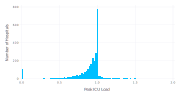

mean(data_peak_v1.icu_load_peak) = 0.8944078826482531


In [81]:
data_peak_v1 = combine(groupby(data, :hospital_pk), :staffed_icu_load => (x -> all(ismissing.(x)) ? NaN : maximum(skipmissing(x))) => :icu_load_peak)
filter!(h -> !isnan(h.icu_load_peak), data_peak_v1)
filter!(h -> 0 <= h.icu_load_peak <= 10, data_peak_v1)

@show mean(data_peak_v1.icu_load_peak)

plot(
    data_peak_v1,
    x = :icu_load_peak,
    Geom.histogram(bincount=300),
    Coord.cartesian(xmax=2),
    Guide.xlabel("Peak ICU Load"),
    Guide.ylabel("Number of Hospitals"),
) |> SVG(18cm, 10cm)

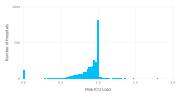

mean(data_peak_v2.icu_load_peak) = 0.8635482546679539


In [75]:
data_peak_v2 = combine(groupby(data, :hospital_pk), :icu_load => (x -> all(ismissing.(x)) ? NaN : maximum(skipmissing(x))) => :icu_load_peak)
filter!(h -> !isnan(h.icu_load_peak), data_peak_v2)
filter!(h -> 0 <= h.icu_load_peak <= 10, data_peak_v2)

@show mean(data_peak_v2.icu_load_peak)

plot(
    data_peak_v2,
    x = :icu_load_peak,
    Geom.histogram,
    Coord.cartesian(xmax=2),
    Guide.xlabel("Peak ICU Load"),
    Guide.ylabel("Number of Hospitals"),
) |> SVG(18cm, 10cm)

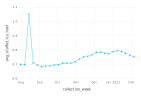

In [93]:
load_timeseries_v1 = combine(groupby(data, :collection_week), :staffed_icu_load => (x -> mean(filter(y -> !ismissing(y) && !isnan(y) && !isinf(y), x))) => :avg_staffed_icu_load);
plot(
    load_timeseries_v1,
    x=:collection_week,
    y=:avg_staffed_icu_load,
    Geom.point, Geom.line,
) |> SVG()

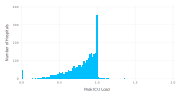

mean(data_peak_v3.icu_load_peak) = 0.7952435217335048


In [103]:
data_peak_v3 = combine(groupby(data, :hospital_pk),
    [:staffed_icu_load, :collection_week] => ((x,y) -> begin
            i = findfirst(==(Date(2021, 01, 08)), y)
            (isnothing(i) || ismissing(x[i])) ? NaN : x[i]
        end) => :icu_load_peak)
filter!(h -> !isnan(h.icu_load_peak), data_peak_v3)
filter!(h -> 0 <= h.icu_load_peak <= 10, data_peak_v3)

@show mean(data_peak_v3.icu_load_peak)

plot(
    data_peak_v3,
    x = :icu_load_peak,
    Geom.histogram,
    Coord.cartesian(xmax=2),
    Guide.xlabel("Peak ICU Load"),
    Guide.ylabel("Number of Hospitals"),
) |> SVG(18cm, 10cm)

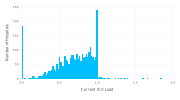

mean(data_latest_v1.icu_load_latest) = 0.6778698024534646


In [77]:
data_latest_v1 = combine(groupby(data, :hospital_pk), :staffed_icu_load => (x -> all(ismissing.(x)) ? NaN : last(filter(y -> !ismissing(y), x))) => :icu_load_latest)
filter!(h -> !isnan(h.icu_load_latest), data_latest_v1)
filter!(h -> 0 <= h.icu_load_latest <= 10, data_latest_v1)

@show mean(data_latest_v1.icu_load_latest)

plot(
    data_latest_v1,
    x = :icu_load_latest,
    Geom.histogram,
    Coord.cartesian(xmax=2),
    Guide.xlabel("Current ICU Load"),
    Guide.ylabel("Number of Hospitals"),
) |> SVG(18cm, 10cm)

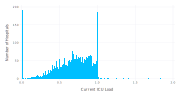

mean(data_latest_v2.icu_load_latest) = 0.6553066032854918


In [104]:
data_latest_v2 = combine(groupby(data, :hospital_pk), :icu_load => (x -> all(ismissing.(x)) ? NaN : last(filter(y -> !ismissing(y), x))) => :icu_load_latest)
filter!(h -> !isnan(h.icu_load_latest), data_latest_v2)
filter!(h -> 0 <= h.icu_load_latest <= 10, data_latest_v2)

@show mean(data_latest_v2.icu_load_latest)

plot(
    data_latest_v2,
    x = :icu_load_latest,
    Geom.histogram,
    Coord.cartesian(xmax=2),
    Guide.xlabel("Current ICU Load"),
    Guide.ylabel("Number of Hospitals"),
) |> SVG(18cm, 10cm)